In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# change the max width of pandas rows and columns to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

## 1 - Load the data from the competition, removing any possible meaningless column.

In [3]:
file = pd.read_csv("/Users/pelingundogdu/Desktop/BTS-18/DSF/Assignment2/data/TrainingSet.csv")
# Dropped the column which name is "Unnamed: 0"
file = file.drop(columns=[file.columns[0]])

print(len(file))
file.head(2)

195402


,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All Social Insurance
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All Social Protection


## 2 - The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [35]:
list(file.groupby(['Series Name']).groups.keys())

['(%) Benefits held by 1st 20% population - All Social Insurance',
 '(%) Benefits held by 1st 20% population - All Social Protection',
 '(%) Benefits held by 1st 20% population - All Social Safety Nets',
 '(%) Benefits held by 1st 20% population - Unemp benefits and ALMP',
 '(%) Generosity of All Social Insurance',
 '(%) Generosity of All Social Protection',
 '(%) Generosity of All Social Safety Nets',
 '(%) Generosity of Unemp benefits and ALMP',
 '(%) Program participation - All Social Insurance',
 '(%) Program participation - All Social Protection',
 '(%) Program participation - All Social Safety Nets',
 '(%) Program participation - Unemp benefits and ALMP',
 '2005 PPP conversion factor, GDP (LCU per international $)',
 '2005 PPP conversion factor, private consumption (LCU per international $)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Achieve universal primary education',
 'Adjusted net enrollment rate, primary, female (% of primary school age children

In [6]:
file.head(2)

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name,category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All Social Insurance,allsi
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All Social Protection,allsp


In [5]:
# Assign the splitted value which dividedby "." to category column
file["category"] = file['Series Code'].str.split('.',1).str[0]
# Defining unique category values with using new created "category" column
category = file.groupby(["category"]).groups.keys()
print(list(category))
print(len(category))

['1', '2', '3', '4', '5', '6', '7', '8', 'AG', 'BG', 'BM', 'BN', 'BX', 'CM', 'DC', 'DT', 'EA', 'EE', 'EG', 'EN', 'EP', 'ER', 'FB', 'FD', 'FI', 'FM', 'FP', 'FR', 'FS', 'GB', 'GC', 'IC', 'IE', 'IP', 'IQ', 'IS', 'IT', 'LP', 'MS', 'NE', 'NV', 'NY', 'PA', 'PX', 'SE', 'SG', 'SH', 'SI', 'SL', 'SM', 'SN', 'SP', 'ST', 'TG', 'TM', 'TT', 'TX', 'VC', 'allsa', 'allsi', 'allsp', 'lm_ub']
62


## 3 - Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

### 3.a - Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns.

In [8]:
def country_series_to_table(country):
    country = file[file["Country Name"] == country]
    new_table = country.filter(regex='YR|Series Name').set_index("Series Name").T
    # Index name changed with year values
    new_table.index = new_table.index.str.split(' ',1).str[0]
    return(new_table)

country_series_to_table("Turkey").head(3)

Series Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: net national savings (% of GNI),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (% of GNI),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Agriculture value added per worker (constant 2005 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Agriculture, value added (constant LCU)","Agriculture, value added (current LCU)","Agriculture, value added (current US$)","Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide",Alternative and nuclear energy (% of total energy use),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Armed forces personnel (% of total labor force),"Armed forces personnel, total",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",Average grace period on new external debt 

In [32]:
country_series_to_table("Turkey").columns

Index(['2005 PPP conversion factor, GDP (LCU per international $)', '2005 PPP conversion factor, private consumption (LCU per international $)', 'ARI treatment (% of children under 5 taken to a health provider)', 'Achieve universal primary education', 'Adjusted net enrollment rate, primary, female (% of primary school age children)', 'Adjusted net enrollment rate, primary, male (% of primary school age children)', 'Adjusted net national income (annual % growth)', 'Adjusted net national income (constant 2005 US$)', 'Adjusted net national income (current US$)', 'Adjusted net national income per capita (annual % growth)',
       ...
       'Water pollution, clay and glass industry (% of total BOD emissions)', 'Water pollution, food industry (% of total BOD emissions)', 'Water pollution, metal industry (% of total BOD emissions)', 'Water pollution, other industry (% of total BOD emissions)', 'Water pollution, paper and pulp industry (% of total BOD emissions)', 'Water pollution, textile in

### 3.b - Write another similar function that receives a series name and returns the countries.

In [9]:
def series_name_to_countries(series_name_value):
    return list(file[file["Series Name"] == series_name_value]["Country Name"])

series_name_to_countries("Alternative and nuclear energy (% of total energy use)")

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, Dem. Rep.',
 'Korea, Rep.',
 'Kosovo',
 'Kuwait',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Li

## 4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

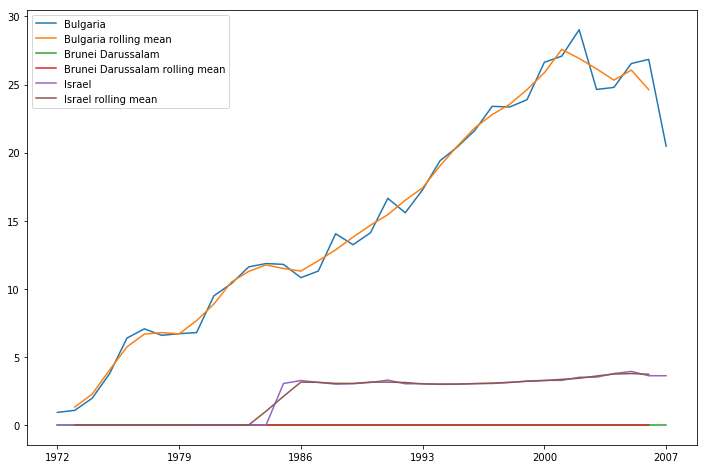

In [12]:
len_of_serie = len(series_name_to_countries("Alternative and nuclear energy (% of total energy use)"))
plt.figure(figsize=(12,8))
graph={}
series_name_to_plot = "Alternative and nuclear energy (% of total energy use)"
for i in random.sample(range(1, len_of_serie), 3):
        #print(i)
        country_name = series_name_to_countries(series_name_to_plot)[i]
        graph["graph_{}".format(i)] = country_series_to_table(country_name)
        graph["graph_{}".format(i)]["mean"] = graph["graph_{}".format(i)][series_name_to_plot].rolling(3, center=True).mean()
        plt.plot(graph["graph_{}".format(i)][series_name_to_plot], label=country_name)
        plt.plot(graph["graph_{}".format(i)]["mean"], label=country_name+" rolling mean")
        plt.xticks(graph["graph_{}".format(i)].index[np.arange(0,36,7)])
        plt.legend(loc='upper left');

## 5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

                Country     Max_value
128  United States       1.594182e+12
23   China               6.762193e+11
45   Germany             2.993701e+11
54   India               2.199881e+11
127  United Kingdom      1.667822e+11
103  Russian Federation  1.620837e+11
110  South Africa        1.487637e+11
62   Japan               1.410198e+11


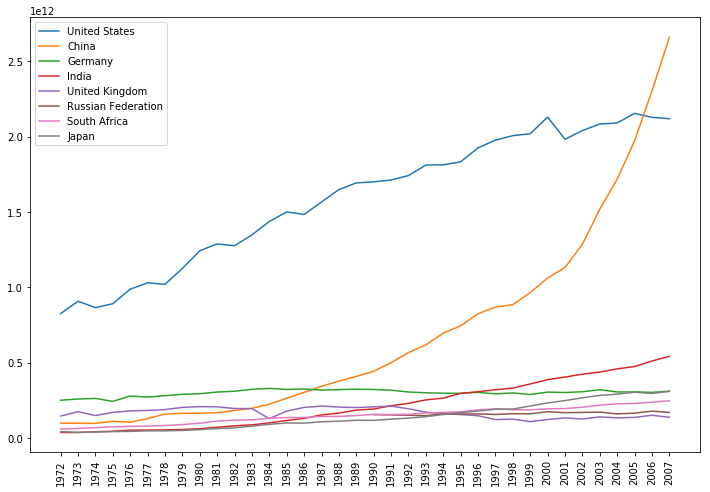

In [15]:
largest_8_country_column = "Electricity production from coal sources (kWh)"
series_name_to_countries(largest_8_country_column)

lagest_8_df = pd.DataFrame(columns=["Country", "Max_value"])
for i in range(1, len(series_name_to_countries(largest_8_country_column))):
    country = series_name_to_countries(largest_8_country_column)[i]
    lagest_8_df.loc[i] = [country ,(country_series_to_table(country)[largest_8_country_column].mean())]

largest_8_country = lagest_8_df.sort_values(by=["Max_value"],ascending=False).head(8)

print(largest_8_country)

graph_largest_8={}
plt.figure(figsize=(12,8))
for i in largest_8_country["Country"].index:
    #print(i)
    country_name = largest_8_country["Country"][i]
    graph_largest_8["graph_{}".format(i)] = country_series_to_table(country_name)
    plt.plot(graph_largest_8["graph_{}".format(i)][largest_8_country_column], label=country_name)
    plt.xticks(rotation="vertical")
    plt.legend(loc='upper left');

## 6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

In [27]:
file_wo_na.pct_change()["Namibia"]

2003 [YR2003]   NaN       
2004 [YR2004]   -0.916667 
2005 [YR2005]    27.000000
2006 [YR2006]    2.464286 
2007 [YR2007]    0.247423 
Name: Namibia, dtype: float64

In [30]:
file_wo_na.pct_change().min()["Namibia"]>0

False

In [28]:
file_wo_na["Namibia"]

2003 [YR2003]    12000000.0 
2004 [YR2004]    1000000.0  
2005 [YR2005]    28000000.0 
2006 [YR2006]    97000000.0 
2007 [YR2007]    121000000.0
Name: Namibia, dtype: float64

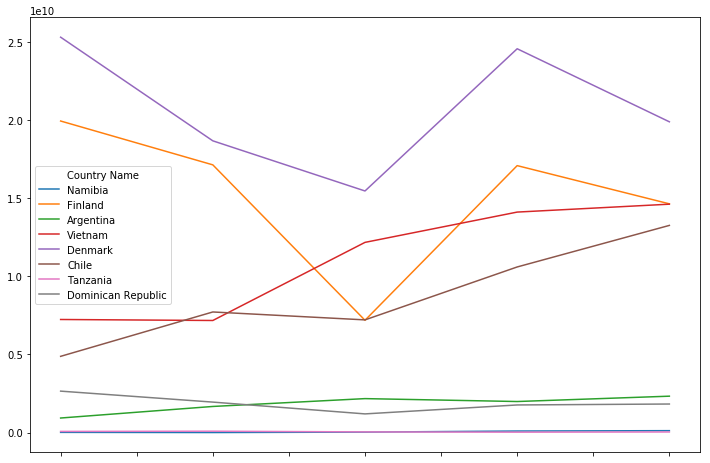

In [24]:
country_year = file[file["Series Name"] == largest_8_country_column].drop(columns=["Series Code", "Series Name", "category"]).set_index("Country Name").T.tail(5)
file_wo_na = country_year.dropna(axis='columns')
file_wo_na = file_wo_na.loc[:, (file_wo_na > 0).all(axis=0)]
file_wo_na.pct_change().max().sort_values(ascending=False).head(8)
last_5  = file_wo_na.pct_change().max().sort_values(ascending=False).head(8).index
file_wo_na = file_wo_na[last_5]
#file_wo_na.pct_change()
file_wo_na.plot(figsize=(12,8))

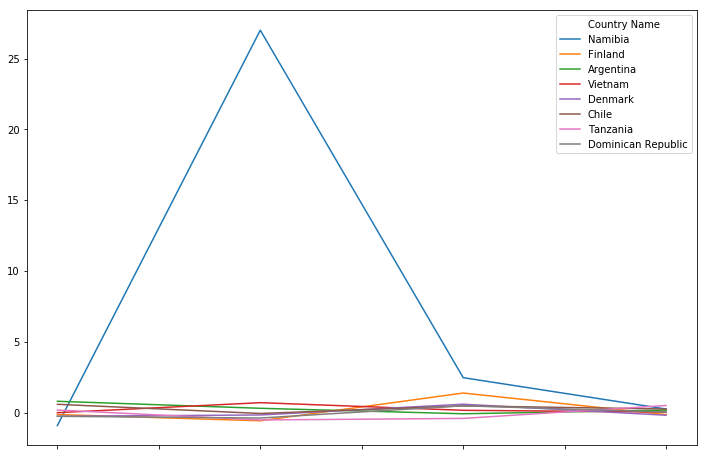

In [217]:
file_wo_na.pct_change().plot(figsize=(12,8))

## 7.Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

### Questions 1 to 6 are worth 0.5 points each, question 7 is totally open (no correct answers) and is worth 2 points, which will include overall presentation and aesthetics.